### otx 패키지 다운로드

In [1]:
!git clone https://github.com/openvinotoolkit/training_extensions.git

Cloning into 'training_extensions'...
remote: Enumerating objects: 100641, done.
remote: Counting objects: 100% (4788/4788), done.
remote: Compressing objects: 100% (1753/1753), done.
remote: Total 100641 (delta 2916), reused 4526 (delta 2799), pack-reused 95853
Receiving objects: 100% (100641/100641), 338.03 MiB | 15.60 MiB/s, done.
Resolving deltas: 100% (67570/67570), done.


In [2]:
%cd training_extensions

/content/training_extensions


### OTX 설치

In [3]:
!pip install  otx[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.6/103.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install mmcv-full==1.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mmcv-full: filename=mmcv_full-1.7.1-cp310-cp310-linux_x86_64.whl size=29941469 sha256=3c57ea10561beb36c6ad674c299da0821187ea94a296334ff64a12291d82a20e
  Stored in directory: /root/.cache/pip/wheels/47/9a/65/470be18e21a8f2d085a024f0731508273543de0b5f79d9ddd4
Successfully built mmcv-full
  Attempting uninstall: mmcv-full
    Found existing installation: mmcv-full 1.7.0
    Uninstalling mmcv-full-1.7.0:
      Successfully uninstalled mmcv-full-1.7.0


### Classification

In [5]:
%cd /content

/content


In [6]:
!mkdir data

In [7]:
import os
import tensorflow as tf
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

68606236/68606236 [==============================] - 4s 0us/step


In [8]:
!mv /root/.keras/datasets/cats_and_dogs_filtered/train /content/data/cats_and_dogs

In [9]:
!ls /content/data/cats_and_dogs

cats  dogs


In [10]:
!otx find --template --task CLASSIFICATION

+----------------+---------------------------------------------------+-----------------------+-----------------------------------------------------------------------------------------------------------------------------+
|      TASK      |                         ID                        |          NAME         |                                                          BASE PATH                                                          |
+----------------+---------------------------------------------------+-----------------------+-----------------------------------------------------------------------------------------------------------------------------+
| CLASSIFICATION | Custom_Image_Classification_MobileNet-V3-large-1x | MobileNet-V3-large-1x | ../usr/local/lib/python3.10/dist-packages/otx/algorithms/classification/configs/mobilenet_v3_large_1_cls_incr/template.yaml |
| CLASSIFICATION |       Custom_Image_Classification_DeiT-Tiny       |       DeiT-Tiny       |           ../usr/loca

In [11]:
!otx build --train-data-roots /content/data/cats_and_dogs --model MobileNet-V3-large-1x

[*] Workspace Path: otx-workspace-CLASSIFICATION
[*] Load Model Template ID: Custom_Image_Classification_MobileNet-V3-large-1x
[*] Load Model Name: MobileNet-V3-large-1x
/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-10-11 09:09:05,942 | WARNING : Duplicate key is detected among bases [{'model'}]
In the CLI, Update ignore to false in model configuration.
[*] 	- Updated: otx-workspace-CLASSIFICATION/model.py
2023-10-11 09:09:05,970 | WARNING : Duplicate key is detected among bases [{'model'}]
[*] 	- Updated: otx-workspace-CLASSIFICATION/model_multilabel.py
[*] 	- Updated: otx-workspace-CLASSIFICATION/data_pipelin

In [12]:
%cd otx-workspace-CLASSIFICATION

/content/otx-workspace-CLASSIFICATION


In [13]:
!otx train

[*] Update data configuration file to: data.yaml
2023-10-11 09:09:24.184654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-10-11 09:09:30,402 | INFO : Classification mode: multiclass
2023-10-11 09:09:30,403 | INFO : train()
2023-10-11 09:09:30,411 | INFO : Training seed was set to 5 w/ deterministic=False.
2023-10-11 09:09:30,415 | INFO : Try to create a 0 size memory pool.
2023-10-11 09:09:30,416 | INFO : configure!: training=True
2023-10-11 09:09:30,421 | INFO : configure_data()
2023-10-11 09:09:30,421 | INFO : tas

In [14]:
!otx export --load-weights outputs/latest_trained_model/models/weights.pth --output openvino_model

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-10-11 09:12:02,885 | INFO : Classification mode: multiclass
2023-10-11 09:12:02,885 | INFO : loading the model from the task env.
2023-10-11 09:12:03,019 | INFO : Exporting the model
2023-10-11 09:12:03,025 | INFO : Training seed was set to 5 w/ deterministic=False.
2023-10-11 09:12:03,029 | INFO : Try to create a 0 size memory pool.
2023-10-11 09:12:03,030 | INFO : configure!: training=False
load checkpoint from local path: openvino_model/logs/env_model_ckpt.pth
2023-10-11 09:12:03,158 | INFO : configure_data()
2023-10-11 09:12:03,158 | INFO : task config!!!!: trai

In [15]:
!otx deploy template.yaml --load-weights openvino_model/openvino.xml --output outputs/deploy

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, tensorflow, onnx, openvino


In [16]:
!cp outputs/deploy/openvino.zip ..

In [18]:
%cd ..

/content


In [19]:
!unzip openvino.zip

Archive:  openvino.zip
 extracting: model/model.xml         
 extracting: model/model.bin         
 extracting: model/config.json       
 extracting: python/model_wrappers/__init__.py  
 extracting: python/model_wrappers/openvino_models.py  
 extracting: python/requirements.txt  
 extracting: python/LICENSE          
 extracting: python/demo.py          
 extracting: README.md               


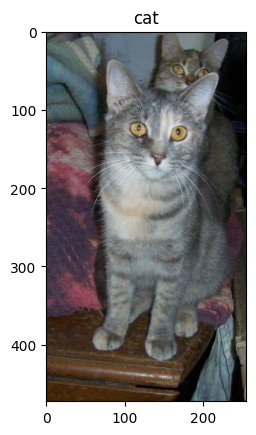

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core
from pathlib import Path

filename="/content/data/cats_and_dogs/cats/cat.51.jpg"
model_xml_path = 'model/model.xml'
model_bin_path = 'model/model.bin'
ie = Core()
model = ie.read_model(model=model_xml_path)
compiled_model = ie.compile_model(model=model, device_name="CPU")
output_layer = compiled_model.output(0)
image = cv2.imread(filename=filename)
resized_image = cv2.resize(image, (224, 224))
input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)
result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)

input_image = np.expand_dims(input_image, 0)
plt.imshow(cv2.cvtColor(image, code=cv2.COLOR_BGR2RGB))
label_name=['cat', 'dog']
target_str = label_name[result_index]
plt.title(label_name[result_index])
plt.show()

### Object Detection

In [21]:
!otx find --template --task DETECTION

+-----------+-----------------------------------+------------------+---------------------------------------------------------------------------------------------------------------------+
|    TASK   |                 ID                |       NAME       |                                                      BASE PATH                                                      |
+-----------+-----------------------------------+------------------+---------------------------------------------------------------------------------------------------------------------+
| DETECTION |  Custom_Object_Detection_Gen3_SSD |       SSD        |  ../usr/local/lib/python3.10/dist-packages/otx/algorithms/detection/configs/detection/mobilenetv2_ssd/template.yaml |
| DETECTION | Custom_Object_Detection_Gen3_ATSS | MobileNetV2-ATSS | ../usr/local/lib/python3.10/dist-packages/otx/algorithms/detection/configs/detection/mobilenetv2_atss/template.yaml |
| DETECTION |   Custom_Object_Detection_YOLOX   |      YOLOX     

In [22]:
%cd /content/data

/content/data


In [23]:
!git clone https://github.com/thsant/wgisd.git

Cloning into 'wgisd'...
remote: Enumerating objects: 4267, done.
remote: Counting objects: 100% (867/867), done.
remote: Compressing objects: 100% (841/841), done.
remote: Total 4267 (delta 27), reused 859 (delta 24), pack-reused 3400
Receiving objects: 100% (4267/4267), 1.39 GiB | 16.28 MiB/s, done.
Resolving deltas: 100% (350/350), done.
Updating files: 100% (1853/1853), done.


In [24]:
%cd /content/data/wgisd
!mv data images
!mv coco_annotations annotations
!mv annotations/test_bbox_instances.json annotations/instances_val.json
!mv annotations/train_bbox_instances.json annotations/instances_train.json

/content/data/wgisd


In [25]:
%cd /content

/content


In [26]:
!otx build --train-data-roots /content/data/wgisd --model MobileNetV2-ATSS

[*] Workspace Path: otx-workspace-DETECTION
[*] Load Model Template ID: Custom_Object_Detection_Gen3_ATSS
[*] Load Model Name: MobileNetV2-ATSS
/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-10-11 09:16:50,249 | WARNING : Duplicate key is detected among bases [{'data_root_path', 'data'}]
2023-10-11 09:16:50,256 | WARNING : Duplicate key is detected among bases [{'model'}]
2023-10-11 09:16:50,257 | WARNING : Duplicate key is detected among bases [{'load_from', 'resume_from', 'task', 'model', 'checkpoint_config'}]
In the CLI, Update ignore to false in model configuration.
[*] 	- Updated: otx-workspace-DETECTION/mo

In [27]:
%cd /content/otx-workspace-DETECTION/

/content/otx-workspace-DETECTION


In [28]:
!otx train

[*] Update data configuration file to: data.yaml
2023-10-11 09:17:16.252442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/otx/api/entities/shapes/shape.py:179: UserWarning: Rectangle coordinates (x=-4.882812572759576e-05, y=0.3860512981484661) are out of bounds, a normalized coordinate system is assumed. All coordinates are expected to be in range (0,1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/otx/api/entities/shapes/rectangle.py:60: UserWarning: Rectangle coordinates are invalid : x1=-4.882812572759576e-05, y1=0.3860512981484661, x2=0.042451173067092896, y2=0.5069523737980769
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/otx/api/entities/shapes/shape.py:179: UserWarning: Rectangle coordinates (x=-4.882812572759576e-05, y=0.5384981595552885) are out of bounds, a normalized coordinate system is assumed. All coordinates are expected to be in range (0,1).
  warnings.warn(

In [29]:
!otx export --load-weights outputs/latest_trained_model/models/weights.pth --output openvino_model

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2023-10-11 09:55:14,370 | INFO : loading the model from the task env.
2023-10-11 09:55:14,467 | INFO : Exporting the model
2023-10-11 09:55:14,473 | INFO : Training seed was set to 5 w/ deterministic=False.
2023-10-11 09:55:14,476 | INFO : Try to create a 0 size memory pool.
2023-10-11 09:55:14,477 | INFO : initialized.
2023-10-11 09:55:14,477 | INFO : configure!: training=False
load checkpoint from local path: openvino_model/logs/env_model_ckpt.pth
2023-10-11 09:55:14,566 | INFO : configure_data()
2023-10-11 09:55:14,566 | INFO : task config!!!!: training=False
load che

In [30]:
!otx deploy template.yaml --load-weights openvino_model/openvino.xml --output outputs/deploy

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, tensorflow, onnx, openvino
2023-10-11 09:55:42,097 | INFO : Loading OpenVINO OTXDetectionTask
2023-10-11 09:55:44,509 | INFO : OpenVINO task initialization completed
2023-10-11 09:55:44,510 | INFO : Deploying the model
2023-10-11 09:55:44,533 | INFO : Deploying completed


In [31]:
%cd /content/otx-workspace-DETECTION

/content/otx-workspace-DETECTION


In [32]:
!rm /content/openvino.zip

In [33]:
!cp outputs/deploy/openvino.zip ..

In [34]:
%cd ..

/content


In [35]:
!unzip openvino.zip -d test

Archive:  openvino.zip
 extracting: test/model/model.xml    
 extracting: test/model/model.bin    
 extracting: test/model/config.json  
 extracting: test/python/model_wrappers/__init__.py  
 extracting: test/python/model_wrappers/openvino_models.py  
 extracting: test/python/requirements.txt  
 extracting: test/python/LICENSE     
 extracting: test/python/demo.py     
 extracting: test/README.md          


In [36]:
%cd test

/content/test


In [37]:
!ls

model  python  README.md


(1365, 2048, 3)


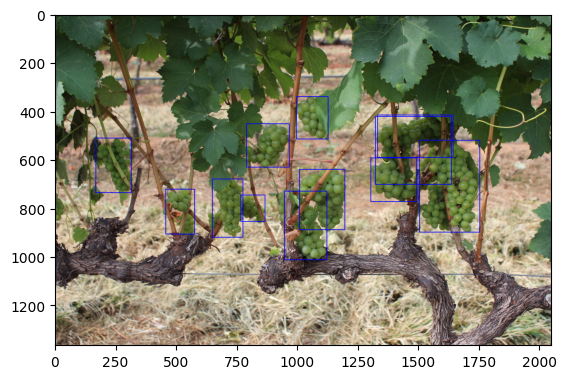

In [38]:
from re import X
from cv2.gapi import YUV2RGB
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core
from pathlib import Path

filename="/content/data/wgisd/images/CDY_2017.jpg"
model_xml_path = 'model/model.xml'
model_bin_path = 'model/model.bin'
ie = Core()
model = ie.read_model(model=model_xml_path)
compiled_model = ie.compile_model(model=model, device_name="CPU")
output_layer = compiled_model.output(0)
image = cv2.imread(filename=filename)
print(image.shape)
resized_image = cv2.resize(image, (992, 736))
# resized_image = cv2.resize(image, (224,224))
input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)
result_infer = compiled_model([input_image])[output_layer]
# print(result_infer.shape)
# print(result_infer[0,0:4])
x_ratio = 992/image.shape[1]
y_ratio = 736/image.shape[0]

clone = image.copy()
for info in result_infer[0]:
    # print(info)

    x1= int(info[0]//x_ratio)
    y1= int(info[1]//y_ratio)
    x2= int(info[2]//x_ratio)
    y2= int(info[3]//y_ratio)
    conf = info[4]
    # print(x1,y1,x2,y2,conf)

    if conf > 0.3:
        cv2.rectangle(clone, (x1, y1), (x2, y2), (255, 0, 0), 2)


# print(clone.shape)
plt.imshow(cv2.cvtColor(clone, code=cv2.COLOR_BGR2RGB))

plt.show()